In [131]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [132]:
quandl.ApiConfig.api_key = 'zcsSFzBsHHYpvoyUj8h7'

company = input("Please enter the company abbreviation to predict")

df = quandl.get(f"WIKI/{company}")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
2004-08-19,50.322842
2004-08-20,54.322689
2004-08-23,54.869377
2004-08-24,52.597363
2004-08-25,53.164113
...,...
2018-03-21,1094.000000
2018-03-22,1053.150000
2018-03-23,1026.550000


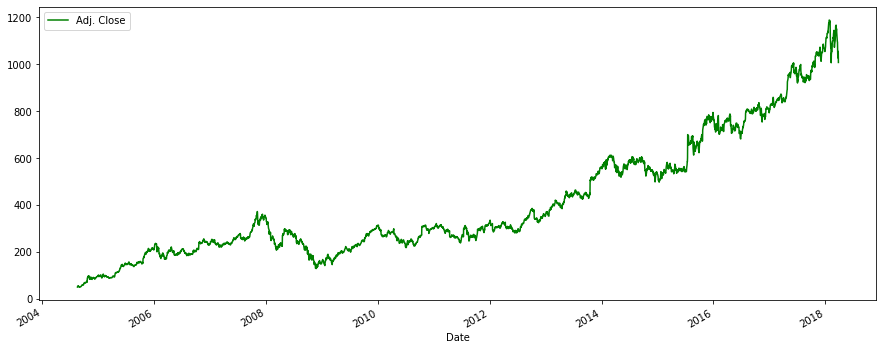

In [133]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [134]:
start_date = datetime.date(2018, 3, 8)
current_date = datetime.date.today()
forecast = current_date - start_date
# Gets the difference between the end of the data and today's date in days and converts it to an integer
# Change int value to however many days you want to convert
forecast_in_days = forecast.days + 366
print(forecast_in_days)
# Shifts the initial graph by -(date difference)
df['Prediction'] = df[['Adj. Close']].shift(-forecast_in_days)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)
# Populates the X axis with the forecasted days
X_forecast = X[-forecast_in_days:]
X = X[:-forecast_in_days]
# Populates the Y axis with the predicted change for the appended days
y = np.array(df['Prediction'])
y = y[:-forecast_in_days]

1408


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
print(f"linear confidence: {confidence}")

forecast_predicted = clf.predict(X_forecast)
print(f"predictions: {forecast_predicted}")

print(len(forecast_predicted))

linear confidence: 0.4011180889451281
predictions: [ 819.12436504  811.70865376  821.14124174 ... 2505.4574498  2572.9858923
 2457.37347168]
1408


<AxesSubplot:xlabel='Date'>

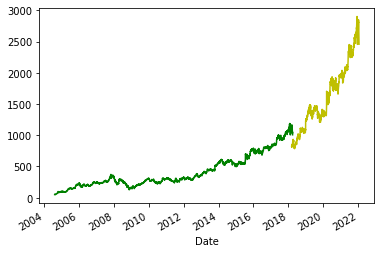

In [136]:
# Change the value in relative delta to extend date of graph
dates = pd.date_range(start=start_date, end=current_date + relativedelta(years=1))
# (X value, y value, colour)
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')